In [89]:
#Load various data sets
from sklearn.datasets import load_wine
#Load classification models
from sklearn.neighbors import KNeighborsClassifier
#Dataset management
from sklearn.model_selection import train_test_split
#Evaluation metrics
from sklearn.metrics import accuracy_score # for classification
from sklearn.metrics import mean_squared_error # for regression
from sklearn.metrics import classification_report
# For data management and visualization
import pandas as pd
# More efficient numeric calculations
import numpy as np

In [43]:
from sklearn.datasets import load_wine

wine_data = load_wine()

dir(wine_data)


print(wine_data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [90]:
inputs = wine_data.data
output = wine_data.target
inputs.shape

(178, 13)

In [91]:
output.shape

(178,)

In [92]:
df = pd.DataFrame(inputs, columns=wine_data.feature_names)
df = pd.concat([df, pd.DataFrame(output)], axis=1)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


<AxesSubplot:>

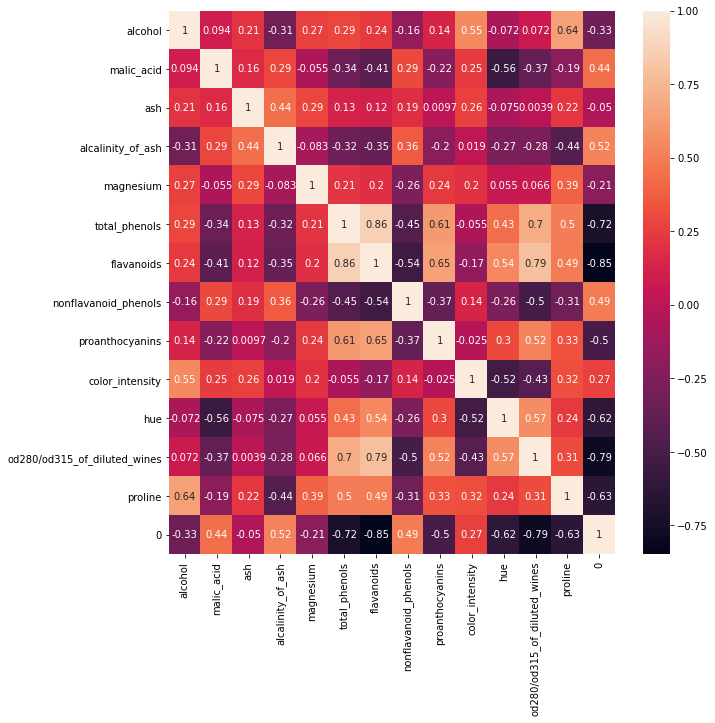

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# corr_matrix = df.corr()
# print(df.corr())
# corr_matrix[0].sort_values(ascending=False)

import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), color = 'k', annot=True)

#df.corr()

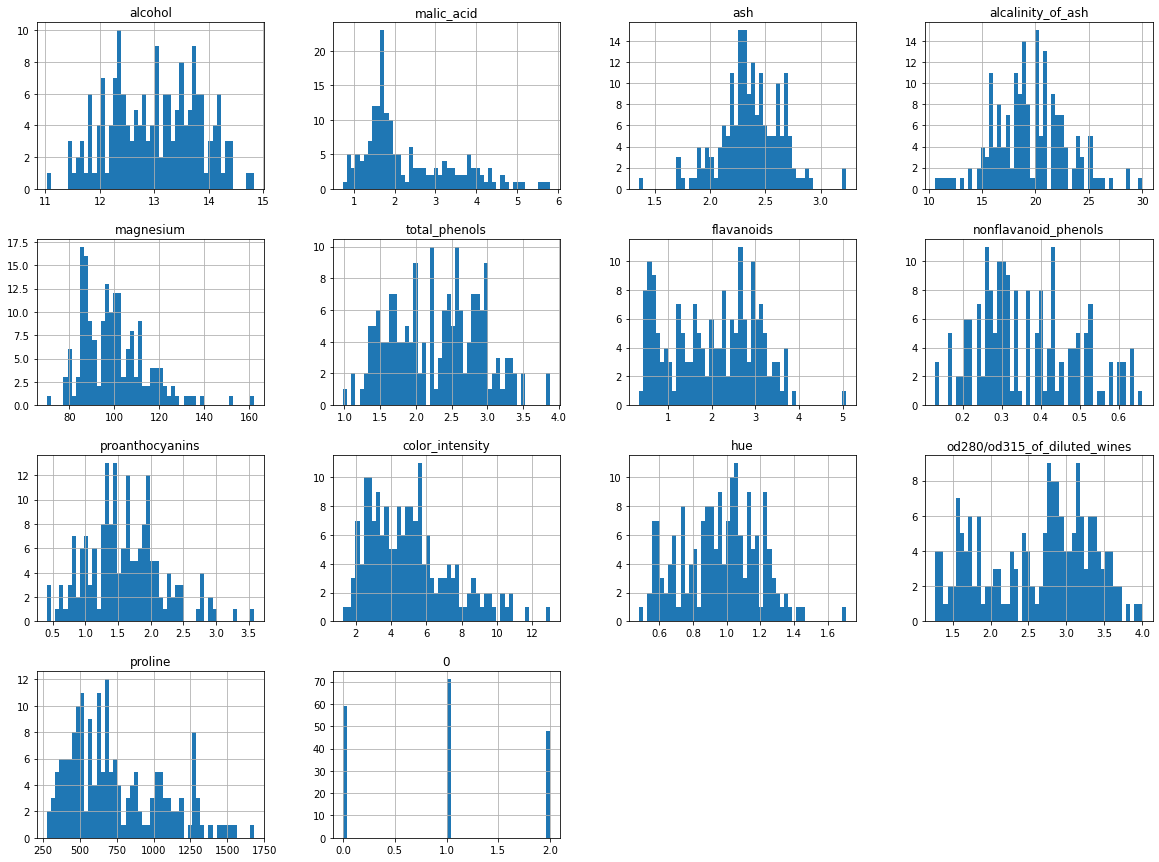

In [94]:
df.hist(bins=50,figsize=(20,15))
plt.show()

In [95]:
#Load the dataset and divide it in X = features and y = labels
X, y = load_wine(return_X_y=True)

#Divide the sample dataset in train/test sets by the specified ratio
print(X.shape,y.shape)

(178, 13) (178,)


In [96]:
# This method shuffles the dataset, then divides it. The "random_state"
# parameter serve as a seed for the shuffling process, allowing
# reproducibility of the results
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(124, 13)
(54, 13)
(124,)
(54,)


In [97]:
# Use the model (KNN)
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print('oi',classification_report(y_test, y_pred))
print(f'Accuracy score:', accuracy_score(y_test, y_pred))

oi               precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54

Accuracy score: 0.7407407407407407


In [98]:
from sklearn.model_selection import cross_val_score

all_accuracies = cross_val_score(estimator=neigh, X=X_train, y=y_train, cv=5)
print(all_accuracies)
print('-------------')
print(all_accuracies.mean())


[0.56       0.68       0.64       0.72       0.66666667]
-------------
0.6533333333333334


In [99]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

from sklearn.model_selection import GridSearchCV

param_grid = [{estimator=neigh,
    
}]


SyntaxError: invalid syntax (<ipython-input-99-7fdf173205b1>, line 10)